In [1]:
import os
import time
import glob
import random
import pandas as pd
import numpy  as np
import tables as tb

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm     as colormap

from mpl_toolkits               import mplot3d
from mpl_toolkits.mplot3d       import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.rcParams["font.size"]      = 12
plt.rcParams["font.family"]    = "sans-serif"
plt.rcParams["font.monospace"] = "Computer Modern Sans Serif"

from invisible_cities.core.system_of_units import *
from invisible_cities.core.configure       import configure
from invisible_cities.core.configure       import all             as all_events

from invisible_cities.database import load_db

In [15]:
path = os.path.expandvars("$HOME/NEXT/DATA/processing/new/")

filename = path + "RunVc_bb_evts.h5"
selection = pd.read_hdf(filename, "dataframe/table")

In [16]:
selection[selection["numb_of_tracks"] == 1];

In [17]:
esmeralda_filename = path + "cdst_7762_v1.2.0_trigger2_bg.h5"
beersheba_filename = path + "ddst_7762_v1.2.0_trigger2.paper_params.h5"

RECO = pd.read_hdf(esmeralda_filename, "CHITS/lowTh")
DECO = pd.read_hdf(beersheba_filename, "DECO/Events")

In [26]:
# choose an event
event = 4175
print("Event", event)


reco = RECO[RECO["event"] == event].copy()
deco = DECO[DECO["event"] == event].copy()

d = 25
xlims = [deco.X.min()-d, deco.X.max()+d]
ylims = [deco.Y.min()-d, deco.Y.max()+d]
zlims = [deco.Z.min()-d/2, deco.Z.max()+d/2]

theta = 25
phi   = 45

Event 4175


<IPython.core.display.Javascript object>


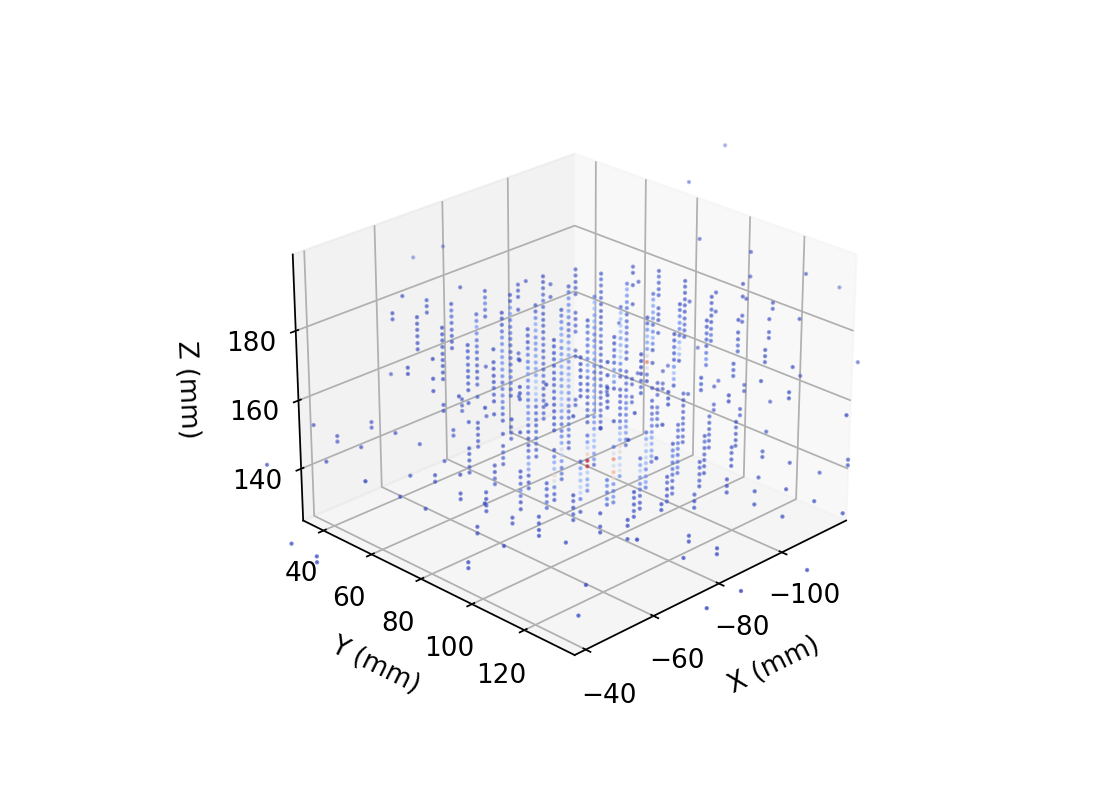

In [27]:
# colapse in Z
# reco = reco.groupby(["X", "Y"]).Ec.sum().reset_index()

norm   = colors  .Normalize(vmin=reco.Ec.min(), vmax=reco.Ec.max(), clip=True)
mapper = colormap.ScalarMappable(norm=norm, cmap=colormap.coolwarm)

fig = plt.figure(figsize=(7, 5))

# ax = fig.add_subplot(111)
# ax.scatter(reco.X, reco.Y, c=mapper.to_rgba(reco.Ec), s=10, marker="s")

ax = fig.add_subplot(111, projection="3d")
ax.scatter(reco.X, reco.Y, reco.Z, c=mapper.to_rgba(reco.Ec), s=1)
#ax.scatter(mchits.x, mchits.y, mchits.z, s=2, c="k")

ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_zlim(zlims)
ax.set_xlabel("X (mm)", labelpad=8)
ax.set_ylabel("Y (mm)", labelpad=8)
ax.set_zlabel("Z (mm)", labelpad=8)

ax.view_init(theta, phi);

<IPython.core.display.Javascript object>


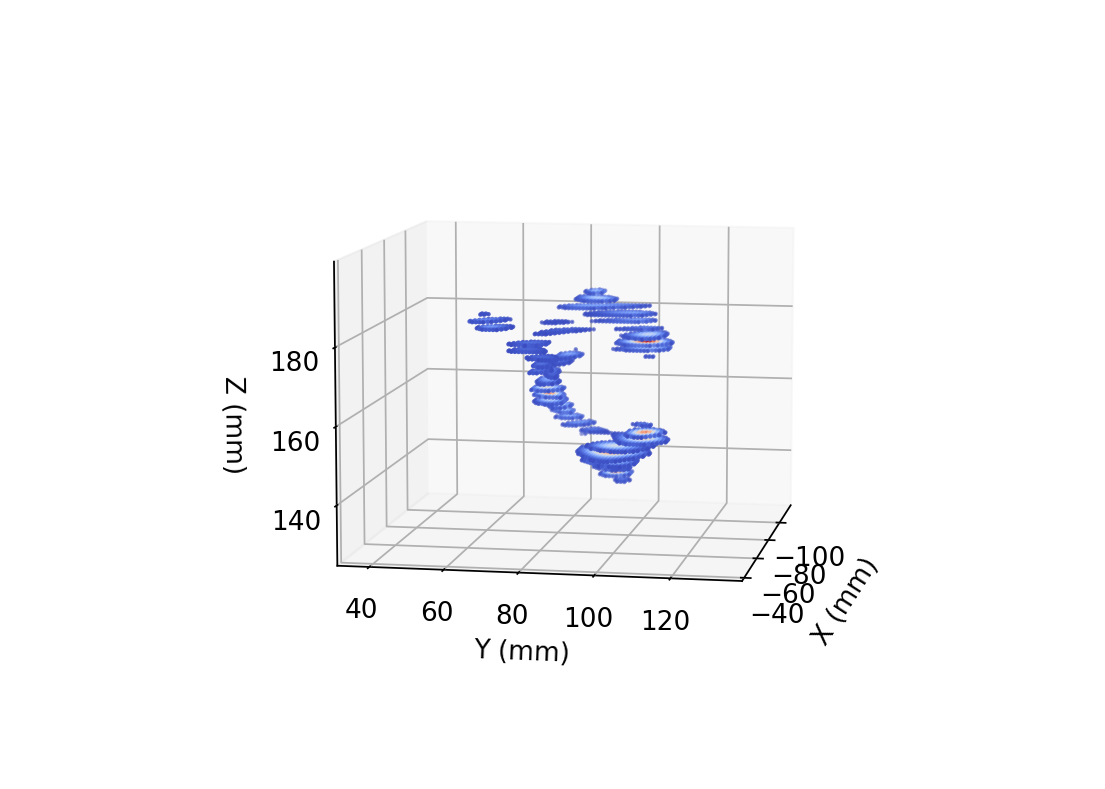

In [28]:
# colapse in Z
# deco = deco.groupby(["X", "Y"]).E.sum().reset_index()

norm   = colors  .Normalize(vmin=deco.E.min(), vmax=deco.E.max(), clip=True)
mapper = colormap.ScalarMappable(norm=norm, cmap=colormap.coolwarm)

fig = plt.figure(figsize=(7, 5))

# ax = fig.add_subplot(111)
# ax.scatter(deco.X, deco.Y, c=mapper.to_rgba(deco.E), s=5, marker="s")

ax = fig.add_subplot(111, projection="3d")
ax.scatter(deco.X, deco.Y, deco.Z, c=mapper.to_rgba(deco.E), s=1)
# ax.scatter(mchits.x, mchits.y, mchits.z, s=2, c="k")

ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_zlim(zlims)
ax.set_xlabel("X (mm)", labelpad=8)
ax.set_ylabel("Y (mm)", labelpad=8)
ax.set_zlabel("Z (mm)", labelpad=8)

ax.view_init(theta, phi);